In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import read_csv
import math
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM,GRU,Bidirectional
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import StackingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 導入資料
data = pd.read_csv('/content/drive/MyDrive/作品集_古書瑋/tea_env_data.csv',encoding='utf-8')
#data=data.drop(['datetime'],axis=1)
data.head()

,datetime,土壤溫度,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,2020/11/6 00:00,21.033898,NaN,NaN,NaN,NaN,NaN
1,2020/11/6 01:00,20.910795,NaN,NaN,NaN,NaN,NaN
2,2020/11/6 02:00,20.757955,NaN,NaN,NaN,NaN,NaN
3,2020/11/6 03:00,20.563068,NaN,NaN,NaN,NaN,NaN
4,2020/11/6 04:00,20.466667,NaN,NaN,NaN,NaN,NaN


In [3]:
# 正規化
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['土壤溫度'].values.reshape(-1,1))

In [4]:
train_size = int(len(scaled_data) * 0.8)
test_size = len(scaled_data) - train_size
train_data, test_data = scaled_data[0:train_size,:], scaled_data[train_size:len(scaled_data),:]

In [5]:

def create_dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]
        X.append(a)
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

look_back = 1
X_train, Y_train = create_dataset(train_data, look_back)
X_test, Y_test = create_dataset(test_data, look_back)

In [6]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [7]:
bilstm_model = Sequential()
bilstm_model.add(Bidirectional(LSTM(units=50, return_sequences=True), input_shape=(look_back, 1)))
bilstm_model.add(Bidirectional(LSTM(units=50)))
bilstm_model.add(Dense(units=1))
bilstm_model.compile(optimizer='adam', loss='mean_squared_error')
bilstm_model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=40, batch_size=64, verbose=1)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/40
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - loss: 0.2105 - val_loss: 0.0041
Epoch 2/40
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0140 - val_loss: 0.0027
Epoch 3/40
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0067 - val_loss: 0.0014
Epoch 4/40
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0028 - val_loss: 7.9603e-04
Epoch 5/40
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0011 - val_loss: 6.7138e-04
Epoch 6/40
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 5.8002e-04 - val_loss: 6.5019e-04
Epoch 7/40
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.2171e-04 - val_loss: 7.1249e-04
Epoch 8/40
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 5.3641e-04 - val_loss: 6.5393e-04
Epoch 9/40
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.4802e-04 - val_loss: 6.5546e-04
Epoch 10/40
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.0894e-04 - val_loss: 6.9413e-04
Epoch 11/40
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5.2416e-04 - val_loss: 6.5903e-04
Epoch 12/40
38/3

In [8]:
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(look_back, 1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(units=1))
lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(X_train, Y_train,validation_data=(X_test, Y_test), epochs=40, batch_size=32, verbose=1)

Epoch 1/40


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.2137 - val_loss: 0.0065
Epoch 2/40
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0158 - val_loss: 0.0027
Epoch 3/40
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0061 - val_loss: 8.2986e-04
Epoch 4/40
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0011 - val_loss: 7.1601e-04
Epoch 5/40
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 6.9458e-04 - val_loss: 8.0870e-04
Epoch 6/40
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 6.1824e-04 - val_loss: 7.1533e-04
Epoch 7/40
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.2515e-04 - val_loss: 6.9390e-04
Epoch 8/40
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5.7577e-04 - val_loss: 6.5806e-04
Epoch 9/40
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.2967e-04 - val_loss: 6.3124e-04
Epoch 10/40
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5.0047e-04 - val_loss: 7.1036e-04
Epoch 11/40
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.8831e-04 - val_loss: 6.4496e-04
Epoch 12/40
75/75 ━━

In [9]:
gru_model = Sequential()
gru_model.add(GRU(units=50,return_sequences=True, input_shape=(look_back, 1)))
gru_model.add(GRU(units=50))
gru_model.add(Dense(units=1))
gru_model.compile(optimizer='adam', loss='mean_squared_error')
gru_model.fit(X_train, Y_train,validation_data=(X_test, Y_test), epochs=40, batch_size=32, verbose=1)

Epoch 1/40
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.1126 - val_loss: 0.0026
Epoch 2/40
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0050 - val_loss: 6.2083e-04
Epoch 3/40
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.5149e-04 - val_loss: 6.2318e-04
Epoch 4/40
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4.1349e-04 - val_loss: 6.3761e-04
Epoch 5/40
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3.8703e-04 - val_loss: 5.9672e-04
Epoch 6/40
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3.8982e-04 - val_loss: 5.8301e-04
Epoch 7/40
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3.7505e-04 - val_loss: 5.8941e-04
Epoch 8/40
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.0433e-04 - val_loss: 5.8579e-04
Epoch 9/40
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.8045e-04 - val_loss: 5.8561e-04
Epoch 10/40
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.7066e-04 - val_loss: 5.8826e-04
Epoch 11/40
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.6384e-04 - val_loss: 5.8725e-

In [10]:
lstm_test = lstm_model.predict(X_test)
bilstm_test = bilstm_model.predict(X_test)
gru_test = gru_model.predict(X_test)
lstm_train = lstm_model.predict(X_train)
bilstm_train = bilstm_model.predict(X_train)
gru_train = gru_model.predict(X_train)

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [11]:
combined_train = np.column_stack((lstm_train,bilstm_train, gru_train))
combined_test = np.column_stack((lstm_test,bilstm_test, gru_test))

In [12]:
blend_model = LinearRegression()
blend_model.fit(combined_train, Y_train)
blend_model.fit(combined_test, Y_test)

LinearRegression()

In [13]:
train_predict=blend_model.predict(combined_train)
test_predict=blend_model.predict(combined_test)

In [14]:
train_predictions = scaler.inverse_transform(train_predict.reshape(-1, 1))
y_train_inverse = scaler.inverse_transform(Y_train.reshape(-1, 1))
test_predictions = scaler.inverse_transform(test_predict.reshape(-1, 1))
y_test_inverse = scaler.inverse_transform(Y_test.reshape(-1, 1))

In [15]:
trainScore = math.sqrt(mean_squared_error(y_train_inverse, train_predictions))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test_inverse, test_predictions))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.26 RMSE
Test Score: 0.30 RMSE


In [16]:
trainPredictPlot = np.empty_like(scaled_data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :1] = train_predictions

testPredictPlot= np.empty_like(scaled_data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2) + 1:len(scaled_data)-1, :1] = test_predictions

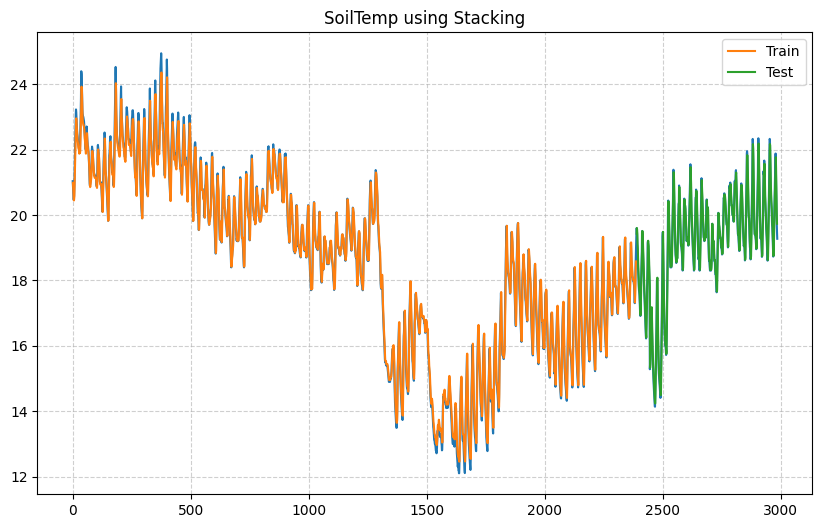

In [17]:
plt.figure(figsize=(10,6))
plt.plot(scaler.inverse_transform(scaled_data))
plt.plot(trainPredictPlot,label='Train')
plt.plot(testPredictPlot,label='Test')
#plt.ylabel('Temperature')
plt.grid(True,linestyle='--',alpha=0.6)
plt.legend()
plt.title('SoilTemp using Stacking')
plt.savefig('TEMP_Stacking.png',dpi=100)
plt.show()

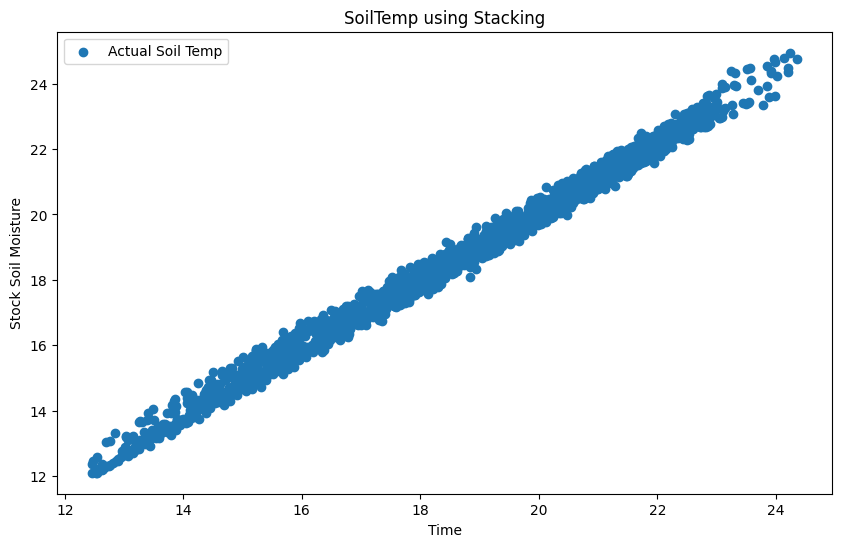

In [18]:
plt.figure(figsize=(10,6))
plt.scatter(train_predictions.flatten(),y_train_inverse.flatten(), label='Actual Soil Temp')
plt.xlabel('Time')
plt.ylabel('Stock Soil Moisture')
plt.title('SoilTemp using Stacking')
plt.legend()
plt.savefig('TEMP_Stacking(scatter).png',dpi=100)
plt.show()